<a href="https://colab.research.google.com/github/SaiSuvamPatnaik/NLP-in-Pytorch/blob/main/NLP_IN_PYTORCH_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [384]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Creating Custom Embedding layer

In [44]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import pandas as pd

In [57]:
str1 = "I am Sai Suvam"
idx = {"I":0,"am":1,"Sai":2,"Suvam":3}
words = str1.split()
res = [idx[i] for i in words]
print(res)

[0, 1, 2, 3]


In [58]:
emb = nn.Embedding(4,5)

In [59]:
emb

Embedding(4, 5)

In [60]:
res1 = torch.tensor(res,dtype=torch.int)
print(emb(res1))

tensor([[ 0.3487,  0.3503,  0.6800,  1.2191,  0.7396],
        [-0.2765,  0.3094,  0.0553,  0.3246,  0.7265],
        [ 1.2239,  0.1168,  1.3115,  0.1312,  0.8654],
        [-0.4217, -1.0807, -0.4846,  0.8160, -2.6856]],
       grad_fn=<EmbeddingBackward0>)


In [5]:
print(sum(emb(res1)))

tensor([ 0.0508, -3.5675, -2.2428, -0.1327, -2.1687], grad_fn=<AddBackward0>)


### Using pre trained word2vec from gensim library

In [385]:
import gensim
from gensim.models import Word2Vec
from nltk import tokenize
sen = """A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed or undirected graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks,RNNs can use their internal state (memory) to process variable length sequences of inputs."""

sen = tokenize.sent_tokenize(sen)
l2 = []
for i in sen:
  l1 = []
  for j in i.split():
    l1.append(j)
  l2.append(l1)

In [386]:
print(words)

['A', 'recurrent', 'neural', 'network', '(RNN)', 'is', 'a', 'class', 'of', 'artificial', 'networks', 'where', 'connections', 'between', 'nodes', 'form', 'directed', 'or', 'undirected', 'graph', 'along', 'temporal', 'sequence.', 'This', 'allows', 'it', 'to', 'exhibit', 'dynamic', 'behavior.', 'Derived', 'from', 'feedforward', 'networks,RNNs', 'can', 'use', 'their', 'internal', 'state', '(memory)', 'process', 'variable', 'length', 'sequences', 'inputs.']


In [387]:
model = Word2Vec(l2, min_count=1, window=1,size=100,sg=1)
words = list(model.wv.vocab)
a = model.similar_by_vector(model["artificial"])
# print(model["artificial"])
print(model.wv.vector_size)

100


In [388]:
print(type(model["artificial"]))

<class 'numpy.ndarray'>


### Load External Vocabulary and analyse using Gensim

In [ ]:
import gensim.downloader as api
from gensim.model import KeyedVectors


In [ ]:
mod = api.load("glove-wiki-gigaword-100")

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
mod.most_similar(positive=["king","women"],negative=["men"])

[('queen', 0.74156653881073),
 ('monarch', 0.7021745443344116),
 ('prince', 0.6327081918716431),
 ('kingdom', 0.6294623613357544),
 ('elizabeth', 0.6115030646324158),
 ('throne', 0.6069279909133911),
 ('emperor', 0.5794594287872314),
 ('father', 0.567244291305542),
 ('son', 0.5642266273498535),
 ('margaret', 0.5641614198684692)]

In [ ]:
mod.vectors[0].shape

(100,)

### PreProcessing in NLP (Tensorflow Trial)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

sentences = ["I want to go out.",
             " I like to play.",
             " No eating - ",
             "No play!",
            ]
tokenizer = Tokenizer(num_words=100, lower= 1, oov_token="<OOV>")

# tokenizer = Tokenizer(num_words=100, lower= 1)

tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print(word_index)

{'i': 1, 'to': 2, 'play': 3, 'no': 4, 'want': 5, 'go': 6, 'out': 7, 'like': 8, 'eating': 9}


In [ ]:
sequences = tokenizer.texts_to_sequences(sentences)
print(sentences)
print(word_index)
print(sequences)

['I want to go out.', ' I like to play.', ' No eating - ', 'No play!']
{'i': 1, 'to': 2, 'play': 3, 'no': 4, 'want': 5, 'go': 6, 'out': 7, 'like': 8, 'eating': 9}
[[1, 5, 2, 6, 7], [1, 8, 2, 3], [4, 9], [4, 3]]


In [ ]:
pre_pad = pad_sequences(sequences, padding='pre')
print("\nword_index = ", word_index)
print("\nsequences = ", sequences)
print("\npadded_seq = " )
print(pre_pad)


word_index =  {'i': 1, 'to': 2, 'play': 3, 'no': 4, 'want': 5, 'go': 6, 'out': 7, 'like': 8, 'eating': 9}

sequences =  [[1, 5, 2, 6, 7], [1, 8, 2, 3], [4, 9], [4, 3]]

padded_seq = 
[[1 5 2 6 7]
 [1 8 2 3 0]
 [4 9 0 0 0]
 [4 3 0 0 0]]


In [ ]:
prepad_maxlen_pretrunc = pad_sequences(sequences, padding ="pre", maxlen =4, truncating ="pre")
print(prepad_maxlen_pretrunc)

[[5 2 6 7]
 [1 8 2 3]
 [0 0 4 9]
 [0 0 4 3]]


### Creating Custom Vocabulary

In [ ]:
class Vocabulary:
    def __init__(self, name):
        self.name = name
        self.PAD_token = 0   # Used for padding short sentences
        self.SOS_token = 1   # Start-of-sentence token
        self.EOS_token = 2   # End-of-sentence token
        self.word2index = {}
        self.word2count = {}
        self.index2word = {self.PAD_token: "PAD", self.SOS_token: "SOS", self.EOS_token: "EOS"}
        self.num_words = 3
        self.num_sentences = 0
        self.longest_sentence = 0

    def add_word(self, word):
        if word not in self.word2index:
            # First entry of word into vocabulary
            self.word2index[word] = self.num_words
            self.word2count[word] = 1
            self.index2word[self.num_words] = word
            self.num_words += 1
        else:
            # Word exists; increase word count
            self.word2count[word] += 1
            
    def add_sentence(self, sentence):
        sentence_len = 0
        for word in sentence.split(' '):
            sentence_len += 1
            self.add_word(word)
        if sentence_len > self.longest_sentence:
            # This is the longest sentence
            self.longest_sentence = sentence_len
        # Count the number of sentences
        self.num_sentences += 1

    def to_word(self, index):
        return self.index2word[index]

    def to_index(self, word):
        return self.word2index[word]

In [ ]:
voc = Vocabulary('test')
print(voc)

In [ ]:
corpus = ["I want to go out.",
             " I like to play.",
             " No eating - ",
             "No play!",
            ]


print(corpus)

['I want to go out.', ' I like to play.', ' No eating - ', 'No play!']


In [ ]:
for sent in corpus:
  voc.add_sentence(sent)
print(voc.word2index)

{'I': 3, 'want': 4, 'to': 5, 'go': 6, 'out.': 7, '': 8, 'like': 9, 'play.': 10, 'No': 11, 'eating': 12, '-': 13, 'play!': 14}


In [ ]:
print('Token 4 corresponds to token:', voc.to_word(4))
print('Token "go" corresponds to index:', voc.to_index('go'))

Token 4 corresponds to token: want
Token "go" corresponds to index: 6


In [ ]:
sen = ""
for word in range(voc.num_words):
    print(voc.to_word(word),end=", ")

PAD, SOS, EOS, I, want, to, go, out., , like, play., No, eating, -, play!, 

In [ ]:
sent_tkns = []
sent_idxs = []
for word in corpus[3].split(' '):
  sent_tkns.append(word)
  sent_idxs.append(voc.to_index(word))
print(sent_tkns)
print(sent_idxs)

['No', 'play!']
[11, 14]


### One Hot Encoding Using CountVectorizer Class from Scikit Learn

In [ ]:
documents = ["I like this movie, it's funny.", 'I hate this movie.', 'This was awesome! I like it.', 'Nice one. I love it.']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

# Step 2. Design the Vocabulary
# The default token pattern removes tokens of a single character. That's why we don't have the "I" and "s" tokens in the output
count_vectorizer = CountVectorizer()

# Step 3. Create the Bag-of-Words Model
bag_of_words = count_vectorizer.fit_transform(documents)

# Show the Bag-of-Words Model as a pandas DataFrame
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,awesome,funny,hate,like,love,movie,nice
0,0,1,0,1,0,1,0
1,0,0,1,0,0,1,0
2,1,0,0,1,0,0,0
3,0,0,0,0,1,0,1


### Using TF-IDF from Scikit Learn

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer()
values = tfidf_vectorizer.fit_transform(documents)

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
pd.DataFrame(values.toarray(), columns = feature_names)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,awesome,funny,hate,it,like,love,movie,nice,one,this,was
0,0.000000,0.571848,0.000000,0.365003,0.450852,0.000000,0.450852,0.000000,0.000000,0.365003,0.000000
1,0.000000,0.000000,0.702035,0.000000,0.000000,0.000000,0.553492,0.000000,0.000000,0.448100,0.000000
2,0.539445,0.000000,0.000000,0.344321,0.425305,0.000000,0.000000,0.000000,0.000000,0.344321,0.539445
3,0.000000,0.000000,0.000000,0.345783,0.000000,0.541736,0.000000,0.541736,0.541736,0.000000,0.000000


#Vectorization of Text data

### Word2Vec in Pytorch

#### SkipGram in Pytorch Without Neural Network

In [ ]:
corpus = [
    'he is a king',
    'she is a queen',
    'he is a man',
    'she is a woman',
    'warsaw is poland capital',
    'berlin is germany capital',
    'paris is france capital',
]

In [ ]:
tokenized_corpus = [x.split() for x in corpus]
vocabulary = []

for sentence in tokenized_corpus:
    for token in sentence:
        if token not in vocabulary:
            vocabulary.append(token)

word2idx = {w: idx for (idx, w) in enumerate(vocabulary)}
idx2word = {idx: w for (idx, w) in enumerate(vocabulary)}

vocabulary_size = len(vocabulary)

print(word2idx)
print(idx2word)
print(vocabulary)

{'he': 0, 'is': 1, 'a': 2, 'king': 3, 'she': 4, 'queen': 5, 'man': 6, 'woman': 7, 'warsaw': 8, 'poland': 9, 'capital': 10, 'berlin': 11, 'germany': 12, 'paris': 13, 'france': 14}
{0: 'he', 1: 'is', 2: 'a', 3: 'king', 4: 'she', 5: 'queen', 6: 'man', 7: 'woman', 8: 'warsaw', 9: 'poland', 10: 'capital', 11: 'berlin', 12: 'germany', 13: 'paris', 14: 'france'}
['he', 'is', 'a', 'king', 'she', 'queen', 'man', 'woman', 'warsaw', 'poland', 'capital', 'berlin', 'germany', 'paris', 'france']


In [ ]:
import numpy as np

window_size = 2
idx_pairs = []

for sentence in tokenized_corpus:                                                         # for each sentence
    indices = [word2idx[word] for word in sentence]
    for center_word_pos in range(len(indices)):                                           # for each word, threated as center word
        for w in range(-window_size, window_size + 1):                                    # for each window position
            context_word_pos = center_word_pos + w                                        # make sure not jump out sentence
            if context_word_pos < 0 or context_word_pos >= len(indices) or center_word_pos == context_word_pos:
                continue
            context_word_idx = indices[context_word_pos]
            idx_pairs.append((indices[center_word_pos], context_word_idx))
    # print(indices)
    break

idx_pairs = np.array(idx_pairs)                                                           # it will be useful to have this as numpy array
print(tokenized_corpus[0])
for i in idx_pairs:
  print(idx2word[i[0]],idx2word[i[1]])

['he', 'is', 'a', 'king']
he is
he a
is he
is a
is king
a he
a is
a king
king is
king a


In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F

In [ ]:
def get_input_layer(word_idx):
    x = torch.zeros(vocabulary_size).float()
    x[word_idx] = 1.0
    return x

In [ ]:
print(idx_pairs)

[[0 1]
 [0 2]
 [1 0]
 [1 2]
 [1 3]
 [2 0]
 [2 1]
 [2 3]
 [3 1]
 [3 2]]


In [ ]:
embedding_dims = 5
W1 = Variable(torch.randn(embedding_dims, vocabulary_size).float(), requires_grad=True)
W2 = Variable(torch.randn(vocabulary_size, embedding_dims).float(), requires_grad=True)
num_epochs = 101
learning_rate = 0.001


for epo in range(num_epochs):
    loss_val = 0
    for data, target in idx_pairs:
        x = Variable(get_input_layer(data)).float()
        # print(x)
        y_true = Variable(torch.from_numpy(np.array([target])).long())

        z1 = torch.matmul(W1, x)
        z2 = torch.matmul(W2, z1)
    
        log_softmax = F.log_softmax(z2, dim=0)

        loss = F.nll_loss(log_softmax.view(1,-1), y_true)
        loss_val += loss.item()
        loss.backward()
        
        W1.data -= learning_rate * W1.grad.data
        W2.data -= learning_rate * W2.grad.data

        W1.grad.data.zero_()
        W2.grad.data.zero_()
    
    if epo % 10 == 0:    
        print(f'Loss at epo {epo}: {loss_val/len(idx_pairs)}')


Loss at epo 0: 4.753465402126312
Loss at epo 10: 4.581019544601441
Loss at epo 20: 4.4241477966308596
Loss at epo 30: 4.280653405189514
Loss at epo 40: 4.148715305328369
Loss at epo 50: 4.026818811893463
Loss at epo 60: 3.9136996507644652
Loss at epo 70: 3.8083030223846435
Loss at epo 80: 3.7097453713417052
Loss at epo 90: 3.617284893989563
Loss at epo 100: 3.530297946929932


#### CBOW

In [125]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [260]:
raw_text = """According to consensus in modern genetics, anatomically modern humans first arrived on the Indian subcontinent from Africa between 73,000 and 55,000 years ago.[1] However, the earliest known human remains in South Asia date to 30,000 years ago. Settled life, which involves the transition from foraging to farming and pastoralism, began in South Asia around 7,000 BCE. At the site of Mehrgarh presence can be documented of the domestication of wheat and barley, rapidly followed by that of goats, sheep, and cattle.[2] By 4,500 BCE, settled life had spread more widely,[2] and began to gradually evolve into the Indus Valley Civilization, an early civilization of the Old world, which was contemporaneous with Ancient Egypt and Mesopotamia. This civilisation flourished between 2,500 BCE and 1900 BCE in what today is Pakistan and north-western India, and was noted for its urban planning, baked brick houses, elaborate drainage, and water supply.[3] In early second millennium BCE persistent drought caused the population of the Indus Valley to scatter from large urban centres to villages. Around the same time, Indo-Aryan tribes moved into the Punjab from Central Asia in several waves of migration. Their Vedic Period (1500-500 BCE) was marked by the composition of the Vedas, large collections of hymns of these tribes. Their varna system, which evolved into the caste system, consisted of a hierarchy of priests, warriors, and free peasants. The pastoral and nomadic Indo-Aryans spread from the Punjab into the Gangetic plain, large swaths of which they deforested for agriculture usage. The composition of Vedic texts ended around 600 BCE, when a new, interregional culture arose. Small chieftaincies, or janapadas, were consolidated into larger states, or mahajanapadas, and a second urbanisation took place. This urbanisation was accompanied by the rise of new ascetic movements in Greater Magadha, including Jainism and Buddhism, which opposed the growing influence of Brahmanism and the primacy of rituals, presided by Brahmin priests, that had come to be associated with Vedic religion,[4] and gave rise to new religious concepts.[5] In response to the success of these movements, Vedic Brahmanism was synthesised with the preexisting religious cultures of the subcontinent, giving rise to Hinduism. Indian Cultural Influence (Greater India) Most of the Indian subcontinent was conquered by the Maurya Empire during the 4th and 3rd centuries BCE. From the 3rd century BCE onwards Prakrit and Pali literature in the north and the Tamil Sangam literature in southern India started to flourish.[6][7] Wootz steel originated in south India in the 3rd century BCE and was exported to foreign countries.[8][9][10] During the Classical period, various parts of India were ruled by numerous dynasties for the next 1,500 years, among which the Gupta Empire stands out. This period, witnessing a Hindu religious and intellectual resurgence, is known as the classical or "Golden Age of India". During this period, aspects of Indian civilisation, administration, culture, and religion (Hinduism and Buddhism) spread to much of Asia, while kingdoms in southern India had maritime business links with the Middle East and the Mediterranean. Indian cultural influence spread over many parts of Southeast Asia, which led to the establishment of Indianised kingdoms in Southeast Asia (Greater India).[11][12] The most significant event between the 7th and 11th century was the Tripartite struggle centred on Kannauj that lasted for more than two centuries between the Pala Empire, Rashtrakuta Empire, and Gurjara-Pratihara Empire. Southern India saw the rise of multiple imperial powers from the middle of the fifth century, most notably the Chalukya, Chola, Pallava, Chera, Pandyan, and Western Chalukya Empires. The Chola dynasty conquered southern India and successfully invaded parts of Southeast Asia, Sri Lanka, the Maldives, and Bengal[13] in the 11th century.[14][15] In the early medieval period Indian mathematics, including Hindu numerals, influenced the development of mathematics and astronomy in the Arab world.[16] Islamic conquests made limited inroads into modern Afghanistan and Sindh as early as the 8th century,[17] followed by the invasions of Mahmud Ghazni.[18] The Delhi Sultanate was founded in 1206 CE by Central Asian Turks who ruled a major part of the northern Indian subcontinent in the early 14th century, but declined in the late 14th century,[19] and saw the advent of the Deccan sultanates.[20] The wealthy Bengal Sultanate also emerged as a major power, lasting over three centuries.[21] This period also saw the emergence of several powerful Hindu states, notably Vijayanagara and Rajput states, such as Mewar. The 15th century saw the advent of Sikhism. The early modern period began in the 16th century, when the Mughal Empire conquered most of the Indian subcontinent,[22] signalling the proto-industrialization, becoming the biggest global economy and manufacturing power,[23] with a nominal GDP that valued a quarter of world GDP, superior than the combination of Europe's GDP.[24][25] The Mughals suffered a gradual decline in the early 18th century, which provided opportunities for the Marathas, Sikhs, Mysoreans, Nizams, and Nawabs of Bengal to exercise control over large regions of the Indian subcontinent.[26][27] From the mid-18th century to the mid-19th century, large regions of India were gradually annexed by the East India Company, a chartered company acting as a sovereign power on behalf of the British government. Dissatisfaction with company rule in India led to the Indian Rebellion of 1857, which rocked parts of north and central India, and led to the dissolution of the company. India was afterwards ruled directly by the British Crown, in the British Raj. After World War I, a nationwide struggle for independence was launched by the Indian National Congress, led by Mahatma Gandhi, and noted for nonviolence. Later, the All-India Muslim League would advocate for a separate Muslim-majority nation state. The British Indian Empire was partitioned in August 1947 into the Dominion of India and Dominion of Pakistan, each gaining its independence.""".split()

In [261]:
CONTEXT_SIZE = 2  
EMDEDDING_DIM = 100

vocab = set(raw_text)
vocab_size = len(vocab)

word_list = list(vocab)

word_to_ix = {word:ix for ix, word in enumerate(vocab)}
ix_to_word = {ix:word for ix, word in enumerate(vocab)}

In [262]:
print(vocab)
print(vocab_size)
print(word_to_ix)
print(ix_to_word)

{'Southeast', '"Golden', 'Central', 'its', 'subcontinent,', "Europe's", 'years,', 'League', 'Civilization,', 'barley,', 'Hindu', 'they', 'goats,', 'Their', 'religion,[4]', 'farming', 'central', 'many', 'India).[11][12]', 'ruled', 'Magadha,', 'Brahmanism', 'Afghanistan', 'control', 'Arab', 'modern', 'was', 'rule', 'literature', 'into', 'gradually', 'Punjab', 'caste', 'primacy', 'world', 'spread', 'caused', 'Asia', 'giving', 'However,', 'regions', 'Chera,', '55,000', 'ago.[1]', 'contemporaneous', 'or', 'flourished', 'between', 'among', 'development', 'Vedas,', 'cattle.[2]', 'south', 'started', 'as', 'Tripartite', 'hierarchy', 'aspects', 'centred', 'more', 'Asian', 'links', 'numerous', 'invasions', 'Indus', 'separate', 'supply.[3]', 'mahajanapadas,', 'Age', 'Delhi', 'mid-18th', 'proto-industrialization,', 'Mughal', 'rise', 'opposed', '1947', 'subcontinent,[22]', 'site', 'Greater', 'sultanates.[20]', 'Brahmin', '14th', 'decline', 'by', 'drainage,', 'conquered', 'Empires.', 'British', 'is',

In [263]:
"""During my second month of nursing school"""
def CBOW(raw_text, window_size=2):
    data = []
    for i in range(window_size, len(raw_text) - window_size):
        context = [raw_text[i - window_size], raw_text[i - (window_size - 1)], raw_text[i + (window_size - 1)], raw_text[i + window_size]]
        
        # context = raw_text[i - window_size:i + window_size+1]
        # context.remove(raw_text[i])                                        //Alternate Way of finding Context Words
        
        target = raw_text[i]
        data.append((context, target))

    return data,target


data,target = CBOW(raw_text)
data[:10]

[(['According', 'to', 'in', 'modern'], 'consensus'),
 (['to', 'consensus', 'modern', 'genetics,'], 'in'),
 (['consensus', 'in', 'genetics,', 'anatomically'], 'modern'),
 (['in', 'modern', 'anatomically', 'modern'], 'genetics,'),
 (['modern', 'genetics,', 'modern', 'humans'], 'anatomically'),
 (['genetics,', 'anatomically', 'humans', 'first'], 'modern'),
 (['anatomically', 'modern', 'first', 'arrived'], 'humans'),
 (['modern', 'humans', 'arrived', 'on'], 'first'),
 (['humans', 'first', 'on', 'the'], 'arrived'),
 (['first', 'arrived', 'the', 'Indian'], 'on')]

In [264]:
def make_context_vector(context, word_to_ix):
    idxs = [word_to_ix[w] for w in context]
    return torch.tensor(idxs, dtype=torch.long)

In [265]:
class CBOW_Model(torch.nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(CBOW_Model, self).__init__()

        #out: 1 x emdedding_dim
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(embedding_dim, 128)
        self.activation_function1 = nn.ReLU()
        
        #out: 1 x vocab_size
        self.linear2 = nn.Linear(128, vocab_size)
        

    def forward(self, inputs):
        # print(sum(self.embeddings(inputs)).view(1,-1))
        embeds = sum(self.embeddings(inputs)).view(1,-1)
        out = self.linear1(embeds)
        out = self.activation_function1(out)
        out = self.linear2(out)
        # print("Output:",out)
        return out

    def get_word_emdedding(self, word):
        word = torch.tensor([word_to_ix[word]])
        # print(word)
        # print(self.embeddings(word).view(1,-1))
        return self.embeddings(word).view(1,-1)

In [266]:
model = CBOW_Model(vocab_size, EMDEDDING_DIM)

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [273]:
#TRAINING
for epoch in tqdm(range(100)):
    total_loss = 0

    for context, target in data:
        c+=1
        context_vector = make_context_vector(context, word_to_ix)  
        
        log_probs = model.forward(context_vector)

        # print("Context: {}, Target: {}, Output: {}".format(context,target,ix_to_word[torch.argmax(model(context_vector), 1).item()]))
        
        total_loss += loss_function(log_probs, torch.tensor([word_to_ix[target]]))

        # break

    if epoch%10==0:
          print("Epoch {}: {}".format(epoch,total_loss.data))
        
    optimizer.zero_grad()
    total_loss.backward()
    optimizer.step()
print(c)

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch 0: 5108.63818359375


 10%|█         | 10/100 [00:06<00:46,  1.93it/s]

Epoch 10: 5095.18505859375


 20%|██        | 20/100 [00:11<00:40,  1.98it/s]

Epoch 20: 5085.59326171875


 30%|███       | 30/100 [00:16<00:34,  2.04it/s]

Epoch 30: 5079.90966796875


 40%|████      | 40/100 [00:21<00:29,  2.02it/s]

Epoch 40: 5073.02001953125


 50%|█████     | 50/100 [00:26<00:24,  2.02it/s]

Epoch 50: 5070.2724609375


 60%|██████    | 60/100 [00:31<00:19,  2.01it/s]

Epoch 60: 5069.91064453125


 70%|███████   | 70/100 [00:36<00:15,  1.99it/s]

Epoch 70: 5068.03076171875


 80%|████████  | 80/100 [00:41<00:10,  1.98it/s]

Epoch 80: 5065.7294921875


 90%|█████████ | 90/100 [00:46<00:05,  2.00it/s]

Epoch 90: 5065.68408203125


100%|██████████| 100/100 [00:51<00:00,  1.95it/s]

195080


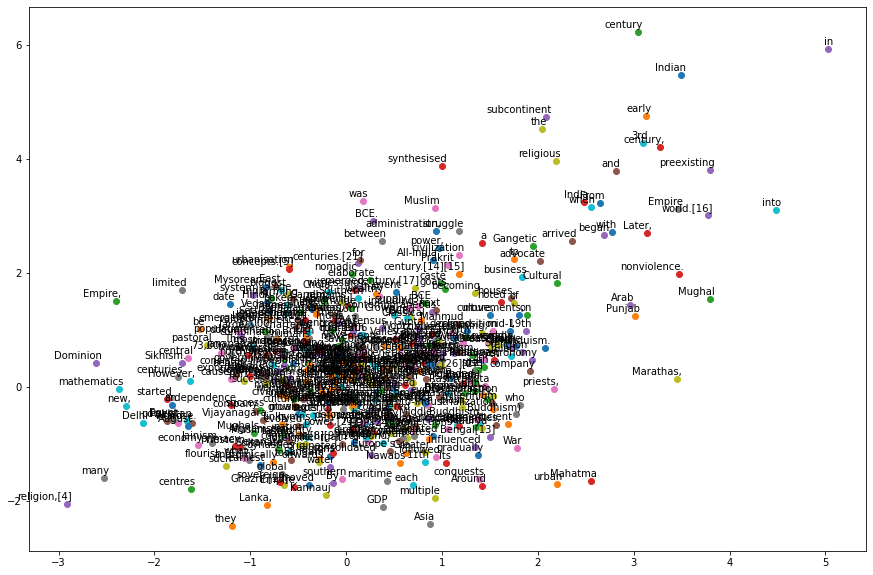

In [274]:
plt.figure(figsize=(15,10))
for w in word_list:
    x = model.get_word_emdedding(w).detach().data.numpy()[0][0]
    y = model.get_word_emdedding(w).detach().data.numpy()[0][1]
    # print(x,y)
    plt.scatter(x, y)
    plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [275]:
data[0]

(['According', 'to', 'in', 'modern'], 'consensus')

In [276]:
def CBOW_test(test_data, model):
    correct_ct = 0

    for context, target in data:
        context_vector = make_context_vector(context, word_to_ix)  
        model.zero_grad()
        predicted = torch.argmax(model(context_vector), 1)
        # print(model(context_vector),predicted)
        if predicted[0] == torch.tensor([word_to_ix[target]]):
                correct_ct += 1
        
    print('Accuracy: {:.1f}% ({:d}/{:d})'.format(correct_ct/len(test_data)*100, correct_ct, len(test_data)))

In [277]:
CBOW_test(data, model)

Accuracy: 9.9% (93/944)


In [75]:
#TESTING
context = ["During" ,"my","month" ,'of']
context_vector = make_context_vector(context, word_to_ix)
a = model(context_vector)

In [76]:
print(torch.argmax(a[0]))

tensor(16)


In [77]:
#Print result
print(f'Raw text: {" ".join(raw_text)}\n')
print(f'Context: {context}\n')
print(f'Prediction: {ix_to_word[torch.argmax(a[0]).item()]}')

Raw text: During my second month of nursing school, our professor gave us a pop quiz. I was a conscientious student and had breezed through the questions, until I read the last one: “What is the first name of the woman who cleans the school?” Surely this was some kind of joke. I had seen the cleaning woman several times. She was tall, dark-haired and in her 50s, but how would I know her name? I handed in my paper, leaving the last question blank. Before class ended, one student asked if the last question would count toward our quiz grade. “Absolutely,” said the professor. “In your careers you will meet many people. All are significant. They deserve your attention and care, even if all you do is smile and say ‘hello’. I’ve never forgotten that lesson. I also learned her name was Dorothy.

Context: ['During', 'my', 'month', 'of']

Prediction: second


#### SkipGram for window size = 1

In [78]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

In [79]:
def random_batch(skip_grams):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    # print(random_index)
    for i in random_index:
        random_inputs.append(skip_grams[i][0])  # target
        random_labels.append(skip_grams[i][1])  # context word

    return random_inputs, random_labels

In [54]:
print(skipgram(word_sequence)[9])
print(skipgram(word_sequence)[65])

['nursing', 'school,']
['the', 'first']


In [120]:
a = random_batch(skipgram(word_sequence))
print(a)
[word_dict[n1] for n1 in a[0]]

(['my', 'woman'], ['During', 'who'])


[18, 30]

In [80]:
sentences = """During my second month of nursing school, our professor gave us a pop quiz.  
I was a conscientious student and had breezed through the questions, until I read the last one: 
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke.""".split()

In [81]:
embedding_size = 10 
batch_size = 2

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}
voc_size = len(word_list)

print(word_list)
print(word_dict)
print(voc_size)

['the', 'our', 'During', 'some', 'us', 'professor', 'pop', 'name', 'Surely', 'quiz.', 'my', 'questions,', 'and', 'I', 'conscientious', '“What', 'of', 'through', 'month', 'woman', 'gave', 'until', 'read', 'had', 'is', 'one:', 'breezed', 'student', 'who', 'a', 'kind', 'second', 'this', 'joke.', 'school,', 'cleans', 'was', 'nursing', 'first', 'last', 'school?”']
{'the': 0, 'our': 1, 'During': 2, 'some': 3, 'us': 4, 'professor': 5, 'pop': 6, 'name': 7, 'Surely': 8, 'quiz.': 9, 'my': 10, 'questions,': 11, 'and': 12, 'I': 13, 'conscientious': 14, '“What': 15, 'of': 16, 'through': 17, 'month': 18, 'woman': 19, 'gave': 20, 'until': 21, 'read': 22, 'had': 23, 'is': 24, 'one:': 25, 'breezed': 26, 'student': 27, 'who': 28, 'a': 29, 'kind': 30, 'second': 31, 'this': 32, 'joke.': 33, 'school,': 34, 'cleans': 35, 'was': 36, 'nursing': 37, 'first': 38, 'last': 39, 'school?”': 40}
41


In [82]:
def skipgram(sentences, window_size=1):
    skip_grams = []
    for i in range(window_size, len(word_sequence) - window_size):
        target = word_sequence[i]
        context = [word_sequence[i - window_size], word_sequence[i + window_size]]
        for w in context:
            skip_grams.append([target, w])

    return skip_grams

In [83]:
skipgram(word_sequence)[0]

['my', 'During']

In [84]:
class skipgramModel(nn.Module):
    def __init__(self):
        super(skipgramModel, self).__init__()
        self.embedding = nn.Embedding(voc_size, embedding_size)
        self.W = nn.Linear(embedding_size, 512, bias=False) 
        self.WT = nn.Linear(512, voc_size, bias=False)

    def forward(self, X):
        embeddings = self.embedding(X)
        hidden_layer = nn.functional.relu(self.W(embeddings))
        output_layer = self.WT(hidden_layer)
        return output_layer

    def get_word_emdedding(self, word):
        word = torch.tensor([word_dict[word]])
        return self.embedding(word).view(1,-1)

In [85]:
model = skipgramModel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [86]:
model

skipgramModel(
  (embedding): Embedding(41, 10)
  (W): Linear(in_features=10, out_features=512, bias=False)
  (WT): Linear(in_features=512, out_features=41, bias=False)
)

In [87]:
"""During my second month of nursing school, our professor gave us a pop quiz.  
I was a conscientious student and had breezed through the questions, until I read the last one: 
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke."""

'During my second month of nursing school, our professor gave us a pop quiz.  \nI was a conscientious student and had breezed through the questions, until I read the last one: \n“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke.'

In [90]:
for epoch in range(10):
    input_batch, target_batch = random_batch(skipgram(word_sequence))
    input_batch1 = [word_dict[n1] for n1 in input_batch]
    input_batch1 = torch.LongTensor(input_batch1)
    target_batch = [word_dict[n1] for n1 in target_batch]
    target_batch = torch.LongTensor(target_batch)
    optimizer.zero_grad()
    output = model(input_batch1)

    print("Epoch",epoch,":","Input: ",input_batch,",",input_batch1,"Target: ",target_batch,"Output: ",torch.argmax(model(input_batch1), 1))
    

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 10000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward(retain_graph=True)
    optimizer.step()

Epoch 0 : Input:  ['“What', 'I'] , tensor([15, 13]) Target:  tensor([24,  9]) Output:  tensor([24, 22])
Epoch 1 : Input:  ['the', 'the'] , tensor([0, 0]) Target:  tensor([40, 24]) Output:  tensor([17, 17])
Epoch 2 : Input:  ['read', 'us'] , tensor([22,  4]) Target:  tensor([ 0, 29]) Output:  tensor([ 0, 20])
Epoch 3 : Input:  ['first', 'the'] , tensor([38,  0]) Target:  tensor([ 0, 17]) Output:  tensor([ 7, 17])
Epoch 4 : Input:  ['is', 'gave'] , tensor([24, 20]) Target:  tensor([15,  4]) Output:  tensor([15,  5])
Epoch 5 : Input:  ['is', 'I'] , tensor([24, 13]) Target:  tensor([15, 21]) Output:  tensor([15,  9])
Epoch 6 : Input:  ['the', 'kind'] , tensor([ 0, 30]) Target:  tensor([19, 16]) Output:  tensor([17,  3])
Epoch 7 : Input:  ['nursing', 'until'] , tensor([37, 21]) Target:  tensor([34, 13]) Output:  tensor([16, 11])
Epoch 8 : Input:  ['nursing', 'breezed'] , tensor([37, 26]) Target:  tensor([34, 23]) Output:  tensor([16, 23])
Epoch 9 : Input:  ['of', 'through'] , tensor([16, 17

In the above code .... The input in the 1st is the word form which we are converting to number using to word_dict dictionary. The 1st element of the input_batch1 is the center word and the 1st element of the target_batch is the context word. The 1st element of the prediction is the context word output of the neural network. 

In [98]:
def Skipgram_test(test_data, model):
    correct_ct = 0

    for i in range(len(test_data)):
        input_batch, target_batch = random_batch(test_data)
        input_batch = [word_dict[n1] for n1 in input_batch]
        input_batch = torch.LongTensor(input_batch)
        target_batch = [word_dict[n1] for n1 in target_batch]
        target_batch = torch.LongTensor(target_batch)

        model.zero_grad()
        predicted = torch.argmax(model(input_batch), 1)

        # print(predicted)

        if predicted[0] == target_batch[0]:
                correct_ct += 1

    print('Accuracy: {:.1f}% ({:d}/{:d})'.format(correct_ct/len(test_data)*100, correct_ct, len(test_data)))

In [99]:
Skipgram_test(skipgram(word_sequence), model)

Accuracy: 40.6% (39/96)


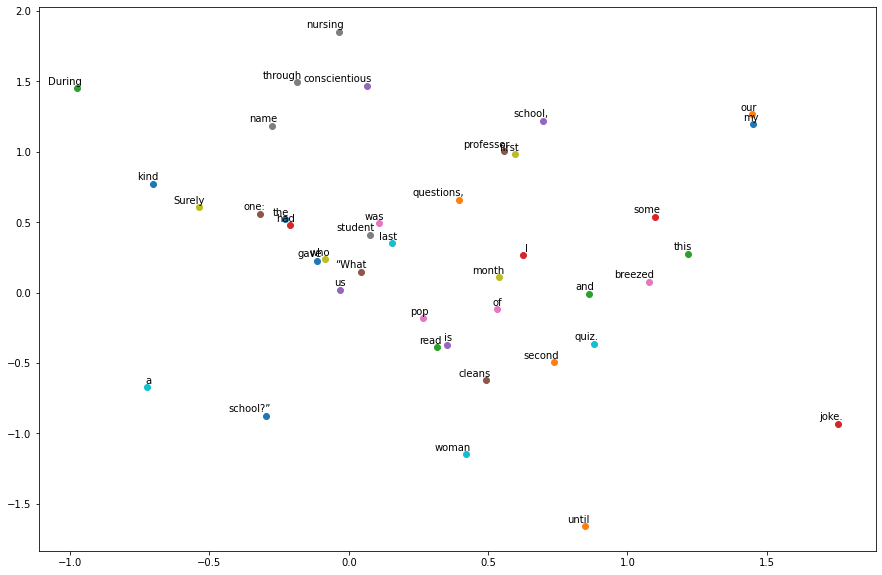

In [100]:
plt.figure(figsize=(15,10))
for w in word_list:
    x = model.get_word_emdedding(w).detach().data.numpy()[0][0]
    y = model.get_word_emdedding(w).detach().data.numpy()[0][1]
    plt.scatter(x, y)
    plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [101]:
pred = "professor".split()

In [102]:
word_dict_inverse = {i:w for w, i in word_dict.items()}

In [123]:
model_pred = []
model_pred.append(pred[0])

word = word_dict_inverse[torch.argmax(model(torch.LongTensor([word_dict[model_pred[-1]]]))).item()]
model_pred.append(word)

print("Center Word: \033[1m {} \033[0;0m , Context Word: \033[1m {} \033[0;0m".format(model_pred[0],model_pred[1]))

Center Word: professor, Context Word: our


#### Skipgram for window size = 2

In [127]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
from tqdm import tqdm

In [128]:
def random_batch(skip_grams):
    random_inputs = []
    random_labels = []
    random_index = np.random.choice(range(len(skip_grams)), batch_size, replace=False)
    # print(random_index)
    for i in random_index:
        random_inputs.append(skip_grams[i][0])  # target
        random_labels.append(skip_grams[i][1])  # context word

    return random_inputs, random_labels

In [ ]:
print(skipgram(word_sequence)[9])
print(skipgram(word_sequence)[65])

['nursing', 'school,']
['the', 'first']


In [ ]:
a = random_batch(skipgram(word_sequence))
print(a)
[word_dict[n1] for n1 in a[0]]

(['my', 'woman'], ['During', 'who'])


[18, 30]

In [129]:
sentences = """During my second month of nursing school, our professor gave us a pop quiz.  
I was a conscientious student and had breezed through the questions, until I read the last one: 
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke.""".split()

In [130]:
embedding_size = 10 
batch_size = 2

word_sequence = " ".join(sentences).split()
word_list = " ".join(sentences).split()
word_list = list(set(word_list))
word_dict = {w: i for i, w in enumerate(word_list)}
voc_size = len(word_list)

print(word_list)
print(word_dict)
print(voc_size)

['our', 'of', 'had', 'questions,', 'the', 'first', 'quiz.', 'student', 'until', 'joke.', 'cleans', 'pop', 'nursing', 'was', 'us', 'professor', 'Surely', 'some', 'my', 'who', 'through', 'name', 'second', 'school,', 'month', 'I', 'one:', 'school?”', 'gave', 'kind', 'woman', 'this', 'and', '“What', 'last', 'conscientious', 'During', 'a', 'is', 'breezed', 'read']
{'our': 0, 'of': 1, 'had': 2, 'questions,': 3, 'the': 4, 'first': 5, 'quiz.': 6, 'student': 7, 'until': 8, 'joke.': 9, 'cleans': 10, 'pop': 11, 'nursing': 12, 'was': 13, 'us': 14, 'professor': 15, 'Surely': 16, 'some': 17, 'my': 18, 'who': 19, 'through': 20, 'name': 21, 'second': 22, 'school,': 23, 'month': 24, 'I': 25, 'one:': 26, 'school?”': 27, 'gave': 28, 'kind': 29, 'woman': 30, 'this': 31, 'and': 32, '“What': 33, 'last': 34, 'conscientious': 35, 'During': 36, 'a': 37, 'is': 38, 'breezed': 39, 'read': 40}
41


In [ ]:
"""During my second month of nursing school, our professor gave us a pop quiz.  
I was a conscientious student and had breezed through the questions, until I read the last one: 
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke."""

In [144]:
def skipgram(sentences, window_size=2):
    skip_grams = []
    for i in range(window_size, len(word_sequence) - window_size):
        target = word_sequence[i]
        context = [word_sequence[i - window_size],word_sequence[i - window_size+1], word_sequence[i + window_size-1],word_sequence[i + window_size]]
        for w in context:
            skip_grams.append([target, w])

    return skip_grams

In [145]:
skipgram(word_sequence)[0]

['second', 'During']

In [146]:
class skipgramModel(nn.Module):
    def __init__(self):
        super(skipgramModel, self).__init__()
        self.embedding = nn.Embedding(voc_size, embedding_size)
        self.W = nn.Linear(embedding_size, 512, bias=False) 
        self.WT = nn.Linear(512, voc_size, bias=False)

    def forward(self, X):
        embeddings = self.embedding(X)
        hidden_layer = nn.functional.relu(self.W(embeddings))
        output_layer = self.WT(hidden_layer)
        return output_layer

    def get_word_emdedding(self, word):
        word = torch.tensor([word_dict[word]])
        return self.embedding(word).view(1,-1)

In [147]:
model = skipgramModel()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [148]:
model

skipgramModel(
  (embedding): Embedding(41, 10)
  (W): Linear(in_features=10, out_features=512, bias=False)
  (WT): Linear(in_features=512, out_features=41, bias=False)
)

In [149]:
"""During my second month of nursing school, our professor gave us a pop quiz.  
I was a conscientious student and had breezed through the questions, until I read the last one: 
“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke."""

'During my second month of nursing school, our professor gave us a pop quiz.  \nI was a conscientious student and had breezed through the questions, until I read the last one: \n“What is the first name of the woman who cleans the school?”  Surely this was some kind of joke.'

In [163]:
for epoch in range(100000):
    input_batch, target_batch = random_batch(skipgram(word_sequence))
    
    input_batch1 = [word_dict[n1] for n1 in input_batch]
    input_batch1 = torch.LongTensor(input_batch1)
    target_batch = [word_dict[n1] for n1 in target_batch]
    target_batch = torch.LongTensor(target_batch)
    optimizer.zero_grad()
    output = model(input_batch1)
    # print(epoch,input_batch,target_batch)
    # print("Epoch",epoch,":","Input: ",input_batch,",",input_batch1,"Target: ",target_batch,"Output: ",torch.argmax(model(input_batch1), 1))

    # output : [batch_size, voc_size], target_batch : [batch_size] (LongTensor, not one-hot)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 10000 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))

    loss.backward(retain_graph=True)
    optimizer.step()

Epoch: 10000 cost = 1.446190
Epoch: 20000 cost = 0.564801
Epoch: 30000 cost = 2.530826
Epoch: 40000 cost = 2.725854
Epoch: 50000 cost = 1.710129
Epoch: 60000 cost = 2.989322
Epoch: 70000 cost = 1.748922
Epoch: 80000 cost = 2.416938
Epoch: 90000 cost = 2.527160
Epoch: 100000 cost = 1.390604


In [164]:
print(word_dict)

{'our': 0, 'of': 1, 'had': 2, 'questions,': 3, 'the': 4, 'first': 5, 'quiz.': 6, 'student': 7, 'until': 8, 'joke.': 9, 'cleans': 10, 'pop': 11, 'nursing': 12, 'was': 13, 'us': 14, 'professor': 15, 'Surely': 16, 'some': 17, 'my': 18, 'who': 19, 'through': 20, 'name': 21, 'second': 22, 'school,': 23, 'month': 24, 'I': 25, 'one:': 26, 'school?”': 27, 'gave': 28, 'kind': 29, 'woman': 30, 'this': 31, 'and': 32, '“What': 33, 'last': 34, 'conscientious': 35, 'During': 36, 'a': 37, 'is': 38, 'breezed': 39, 'read': 40}


In [165]:
def Skipgram_test(test_data, model):
    correct_ct = 0

    for i in range(len(test_data)):
        input_batch, target_batch = random_batch(test_data)
        input_batch = [word_dict[n1] for n1 in input_batch]
        input_batch = torch.LongTensor(input_batch)
        target_batch = [word_dict[n1] for n1 in target_batch]
        target_batch = torch.LongTensor(target_batch)

        model.zero_grad()
        predicted = torch.argmax(model(input_batch), 1)

        if predicted[0] == target_batch[0]:
                correct_ct += 1

    print('Accuracy: {:.1f}% ({:d}/{:d})'.format(correct_ct/len(test_data)*100, correct_ct, len(test_data)))

In [166]:
Skipgram_test(skipgram(word_sequence), model)

Accuracy: 11.4% (21/184)


In [180]:
w

'read'

In [185]:
model.get_word_emdedding(w).detach().data.numpy()[0][0]

-2.0611196

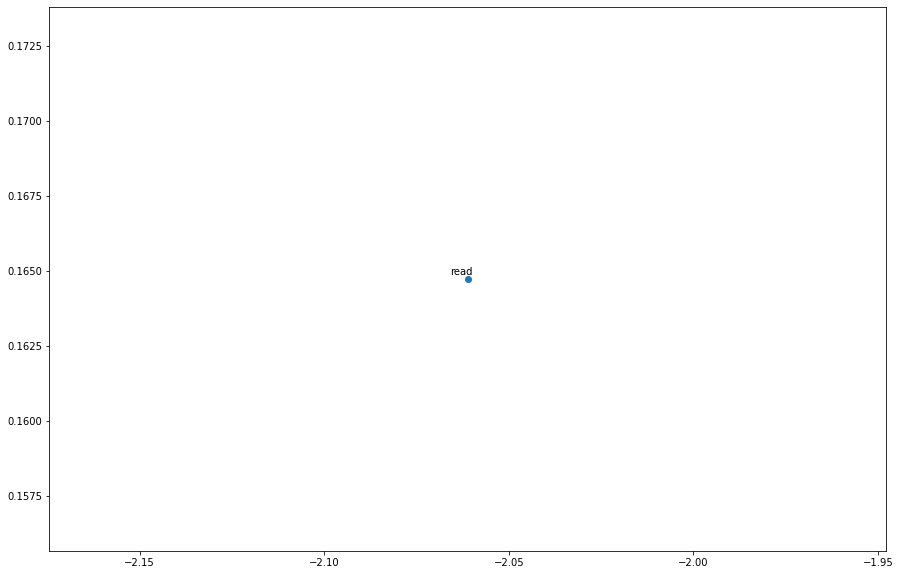

In [186]:
plt.figure(figsize=(15,10))

x = model.get_word_emdedding(w).detach().data.numpy()[0][0]
y = model.get_word_emdedding(w).detach().data.numpy()[0][1]
plt.scatter(x, y)
plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')

plt.show()

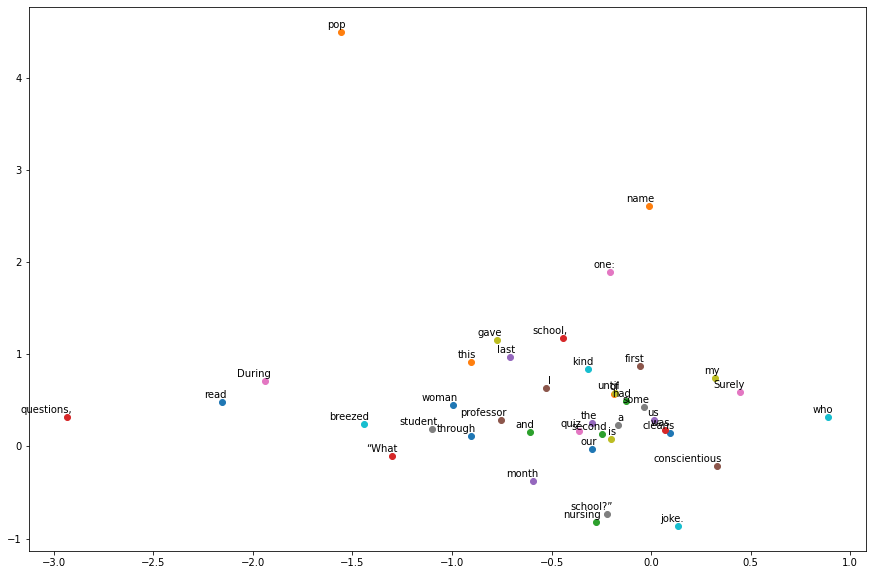

In [167]:
plt.figure(figsize=(15,10))
for w in word_list:
    x = model.get_word_emdedding(w).detach().data.numpy()[0][0]
    y = model.get_word_emdedding(w).detach().data.numpy()[0][1]
    plt.scatter(x, y)
    plt.annotate(w, xy=(x, y), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom')
plt.show()

In [168]:
pred = "professor".split()
# nursing school

In [169]:
word_dict_inverse = {i:w for w, i in word_dict.items()}


In [170]:
model_pred = []
e = 0
model_pred.append(pred[0])

word = word_dict_inverse[torch.argmax(model(torch.LongTensor([word_dict[model_pred[-1]]]))).item()]
model_pred.append(word)

' '.join(model_pred)

'professor our'

In [314]:
import gensim
from gensim.models import Word2Vec
from nltk import tokenize
sen = """A recurrent neural network (RNN) is a class of artificial neural networks where connections between nodes form a directed or undirected graph along a temporal sequence. This allows it to exhibit temporal dynamic behavior. Derived from feedforward neural networks,RNNs can use their internal state (memory) to process variable length sequences of inputs."""

sen = tokenize.sent_tokenize(sen)
l2 = []
for i in sen:
  l1 = []
  for j in i.split():
    l1.append(j)
  l2.append(l1)

In [357]:
model = Word2Vec(l2, min_count=1, window=1,size=100,sg=1)
words = list(model.wv.vocab)
a = model.similar_by_vector(model["artificial"])

max = a[0][1]
c = 0
a.sort(key = lambda x: x[1]) 
print(a)   
# print(c)

print(model["artificial"])

[('internal', 0.09047636389732361), ('is', 0.09048963338136673), ('of', 0.1044875830411911), ('between', 0.10469523072242737), ('behavior.', 0.10541510581970215), ('(memory)', 0.10626307129859924), ('it', 0.13104388117790222), ('temporal', 0.18223702907562256), ('class', 0.1826116442680359), ('artificial', 1.0)]
[ 1.0810290e-03  4.0936982e-03  2.1918870e-03 -1.0174013e-03
 -2.8375802e-03  4.7938260e-03  1.9269662e-03  1.7564942e-07
  1.5148775e-03  3.5269582e-04  2.5599184e-03  1.1295858e-03
  3.3150549e-04  3.8464826e-03  1.0402461e-03 -4.4105371e-05
 -4.8817284e-03 -2.7084104e-03 -3.1642539e-03 -2.6776171e-03
 -4.8911264e-03  4.0653381e-03 -4.5130444e-03 -9.8235963e-05
 -1.9711964e-03 -3.6742373e-03 -4.5576622e-03 -1.0649351e-03
  2.9421889e-03  2.5586034e-03 -4.5217229e-03 -4.6066451e-03
  4.2183441e-03  4.7154012e-03  4.3740540e-04  1.1298073e-03
 -4.9807765e-03 -5.4344628e-04  4.8435614e-03  4.0725800e-03
 -3.0404618e-03  3.5645540e-03 -3.8129420e-03 -9.1997773e-04
  1.9034578e-03

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `similar_by_vector` (Method will be removed in 4.0.0, use self.wv.similar_by_vector() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # This is added back by InteractiveShellApp.init_path()
